# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [8]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [9]:
greet()

Hello, welcome to the class!


In [10]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

In [11]:
calculate_area(5)

78.53975

In [13]:
for radius in [1,2,3]:
    area = calculate_area(radius)
    print(f"the area of a circle with radius {radius} is {area:.2f}")

the area of a circle with radius 1 is 3.14
the area of a circle with radius 2 is 12.57
the area of a circle with radius 3 is 28.27


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [4]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data/ca_state_boundary','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

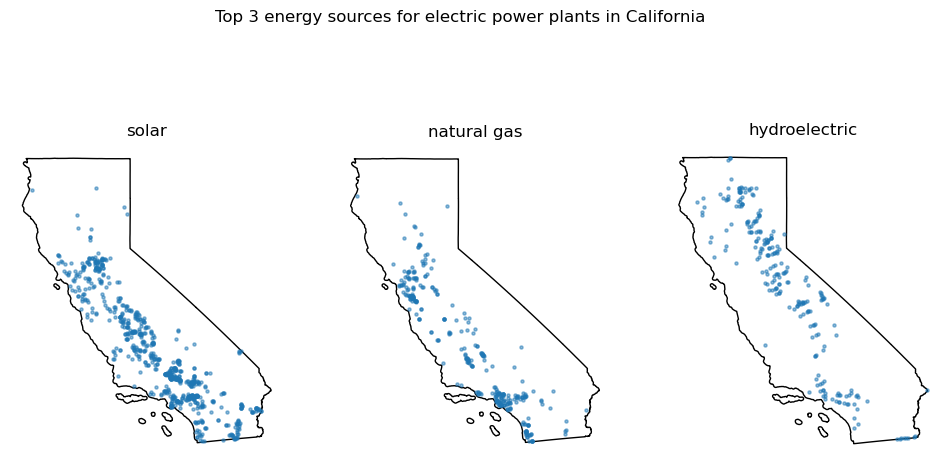

In [6]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

# Steps to create a function

My recommended steps for writing a function:
1) Solve problem for a specific example
2) Identiyf which parts of the code need to be feneralized and u[pfate these parts
3) wrap this into a fcuntion
4) add additional parameters or assert statements
5) test the function
6) add a docstring

Example: we want to take top three power sources for any state programmitcally as a fucntion

In [15]:
# 1) step one solve for specific example
#example: solve for CA

#subset
state_power_plants = power_plants[power_plants['state'] =='California']

In [60]:
top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
.tolist())

top_sources

['solar', 'natural gas', 'hydroelectric']

In [24]:
state = 'California'
state_power_plants = power_plants[power_plants['state'] ==state]
top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
               .tolist())

top_sources

['solar', 'natural gas', 'hydroelectric']

In [ ]:
### Step 3: define the function
### Step 4: adjust parameters

def top3_sources(state, power_plants):
    state_power_plants = power_plants[power_plants['state'] ==state]
    top_sources = (state_power_plants['primsource']
                .value_counts()
                .index[:3]
                .tolist())
    return top_sources

In [33]:
top3_sources('Maine', power_plants)

['hydroelectric', 'solar', 'wind']

## Example

Create a function trht will proicucce a ploitr given a list of proimarty sources and a state name. (Rectreate the previous plot for any state).



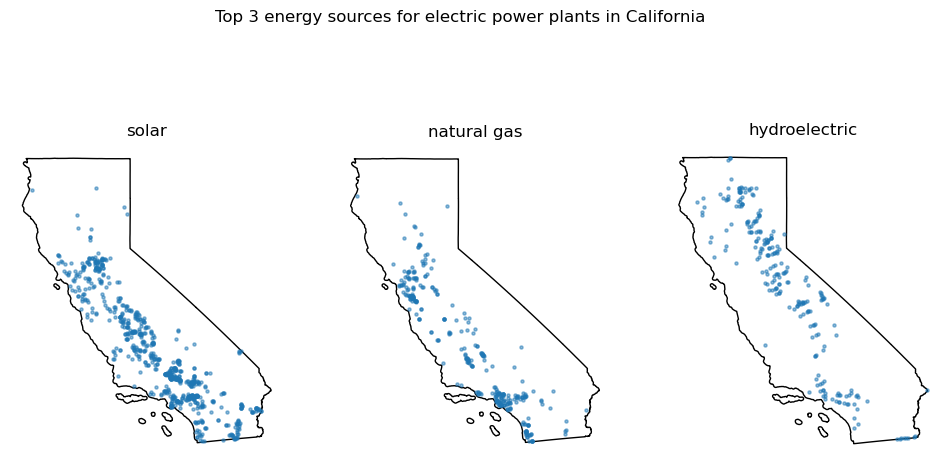

In [ ]:
# solve an example

# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()


Step 2: which parts of the code need to be generalized 

Anything with california

In [42]:
def plot_top3_power_sources(state, power_plants,states):
# Select CA power plants and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]

# State top 3 power sources were previously given
    state_power_plants = power_plants[power_plants['state'] ==state]

# Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.show()

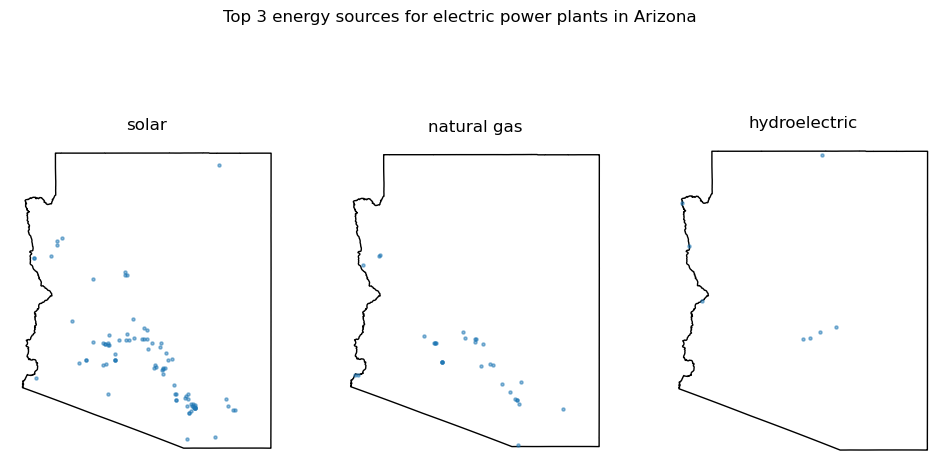

In [46]:
plot_top3_power_sources('Arizona',power_plants,states)

In [47]:
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


In [66]:
prim_sources = power_plants[power_plants['primsource'] == 'petroleum']
#prim_sources

In [73]:
state_powerplant = prim_sources.groupby('state')['primsource'].value_counts()
state_powerplant

state           primsource
Alabama         petroleum      3
Alaska          petroleum     93
Arizona         petroleum      1
Arkansas        petroleum      2
California      petroleum     13
Colorado        petroleum      9
Connecticut     petroleum     24
Delaware        petroleum      3
Florida         petroleum      8
Georgia         petroleum     23
Hawaii          petroleum     18
Idaho           petroleum      1
Illinois        petroleum     33
Indiana         petroleum      6
Iowa            petroleum     90
Kansas          petroleum     35
Kentucky        petroleum      1
Louisiana       petroleum      3
Maine           petroleum      3
Maryland        petroleum     11
Massachusetts   petroleum     17
Michigan        petroleum     26
Minnesota       petroleum     60
Mississippi     petroleum      1
Missouri        petroleum     34
Montana         petroleum      1
Nebraska        petroleum     27
Nevada          petroleum      1
New Hampshire   petroleum      6
New Jersey      

In [95]:
# function
def power_source_counts(source):
    prim_sources = power_plants[power_plants['primsource'] == source]
    state_powerplant = prim_sources.groupby('state')['primsource'].value_counts()
    return power_source_counts

In [96]:
power_source_counts('petroleum')

<function __main__.power_source_counts(source)>

In [ ]:
## Solution

top_states = power_plants[power_plants.primsource == 'wind'].state.value_counts()

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [90]:
## Solution
# identify what to generalize
source = 'wind'
top_states = power_plants[power_plants.primsource == source].state.value_counts()
top_states

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [91]:
#wrap function, add params

def power_source_counts(source, power_plants):
    top_states = power_plants[power_plants.primsource == source].state.value_counts()
    return top_states
power_source_counts('wind',power_plants)

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [53]:
give_primsource('petroleum')

<function __main__.give_primsource(primsource)>